In this lesson, we'll see how we can take the matplotlib skills we've picked up in this course, and apply them to the web using some of the hottest new visualization libraries out today. And, in the next few examples, we'll see how to turn our matplotlib plots into web-ready, interactive graphics using the [Bokeh][1], [Plot.ly][2], and [mpld3][3] libraries. 

So, let's go ahead and get setup so we can see some of these libraries in action.

[1]: http://bokeh.pydata.org/
[2]: https://plot.ly/
[3]: http://mpld3.github.io/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Now, you probably noticed that the setup for this lesson is a bit sparse compared to some of the earlier lessons. The reason for this is that each of the libraries that we'll be using in this lesson has its own unique set of steps that we must follow in order to use it within a Jupyter notebook, and so we'll run through a separate setup for each library as we use it. With that in mind, as far as a common setup goes, we simply need to import the `pyplot` module and the NumPy library this time around.

Ok, so common imports out of the way, let's take a look at our first library, bokeh.

## Bokeh

Bokeh is a visualization library for building interactive graphics for modern web browsers. Its goal is to make the generation of novel graphics, similar to what can be produced with the [D3.js][1] library, but with an emphasis on providing high-performance over very large datasets. The library was created by Continuum, the company responsible for the Anaconda distribution of python that we're using in this course, as well as many more interesting data-oriented products. 

[1]: https://d3js.org/

Now, the bokeh library wasn't designed with matplotlib in mind, but as you'll see time-and-time again, one of the benefits that matplotlib enjoys, being the de facto standard visualization library for python, is that pretty much every other visualization library provides at least some rudimentary support for it. And, if you take a look at [bokeh's FAQ page][2], you'll see the following quote:

> "Bokeh also intends to fully support the MPL interface (and hence Seaborn, pandas, and ggplot.py)..."

[2]: http://bokeh.pydata.org/en/0.10.0/docs/faq.html#how-does-bokeh-compare-to-mpld3

What this means for us, is that we can take many of our matplotlib plots, and without any modifications, render them using the Bokeh library. So, how do we do that?

### Bokeh Setup

Well, Bokeh comes with a handful of `output_` functions, well three to be exact, that allow us to define where we want to output the results of a visualization. The `output_file` function allows you to save your visualization to a static HTML file, and the `output_server` function can be used with the Bokeh server to create interactive applications, but for our purposes, the `output_notebook` function is the most important. Calling the `output_notebook` function will make sure that the output of our Bokeh visualizations are sent to the notebook cells when we call the `show` function. So, let's get our notebook set up to render our matplotlib plots using the Bokeh library.

In the following cell, we import the `output_notebook` and `show` functions along with the `mpl` module, which will give us access to the `to_bokeh` function, which allows us to translate our matplotlib figures into Bokeh visualizations. Then, we'll call the `output_notebook` function to make sure our output is displayed within the cell. 

In [ ]:
from bokeh import mpl
from bokeh.plotting import output_notebook, show
output_notebook(hide_banner=True)

Next, we'll create our matplotlib plot, just like we would any other.

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x / 2)
z = np.cos(x / 4)

plt.title("Matplotlib Figure in Bokeh")
plt.plot(x, y, "r-", marker='o')
plt.plot(x, z, "g-x", linestyle="-.");

Finally, we'll call the `mpl.to_bokeh()` function to translate the current figure into a Bokeh plot, then we'll call the `show` function on the `bokeh.models.plots.Plot` instance to display it.

In [ ]:
show(mpl.to_bokeh());

And, there you go! Notice that the Bokeh plot above gives us many of the same interactive features that the `notebook` backend gave us when we explored it in the chapter on interactivity. 

Ok, so that's Bokeh, but what about Plotly?

## Plot.ly

[Plotly][1] is the name for a brand new visualization library that, like Bokeh, targets modern web browsers and can be used to create beautiful and interactive graphics with very little effort. It also happens to be the name of the company behind the library's creation. Plotly, the company, is focused on creating a collaborative environment for sharing data visualizations, or as the company refers to itself, a "GitHub for data scientists". A core component of that product is the Plotly visualization library, and in many ways, it is very similar to Bokeh. Both library's have a JavaScript component that's responsible for rendering the visualization and a language-dependent client library that talks with that JavaScript component via a JSON-based communication protocol. 

Now, until recently, only the language-dependent client libraries for Plotly were open source. This meant that it was possible to create a visualization with Plotly in your favorite language, but to do so, you had to have a Plotly account since that visualization relied on the Plotly servers to render and host your graphic. However, recently, the Plotly team has [open sourced the Ploly.js][2] library, which allows the Plotly library to be used in an ["offline" capacity][3] making it a direct competitor to the Bokeh library.

[1]: https://plot.ly/
[2]: https://plot.ly/javascript/open-source-announcement/
[3]: https://plot.ly/python/offline/

### Plotly vs Bokeh

So, the question then, is where do the two libraries differ?

Well, one major difference is with the types of graphic that each library produces. Bokeh generates raster graphics using the JavaScript canvas element, while Plotly renders its visualizations using the D3.js library which generates vector images. Using the canvas element to generate bitmaps, instead of SVG, should give Bokeh a slight edge when it comes to the total number of data elements that can be displayed on the screen without hindering performance. That said, in some cases, [Plotly does provide a way to render graphics using WebGL][1], which can take advantage of modern computer architectures to speed up the rendering process making it more competitive with Bokeh---though, [Bokeh has also started dabbling with WebGL][2] as well. On the whole, my money is on Bokeh when it comes to performance, simply because that has always been a major focus of the library, whereas Plotly's main focus has always been on collaboration. 

At the end of the day though, both libraries are quite young and are still in the process of differentiating themselves, so choosing to go with either one is probably more a function of personal taste than anything else at this point in time. 

[1]: https://plot.ly/python/webgl-vs-svg/
[2]: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/webgl.html

So, we've discussed some of the differences, but we haven't actually seen an example of Plotly's output just yet. And that brings us to the next section, setting up Plotly.

### Plotly Setup

The setup for Plotly is fairly similar to Bokeh's. In the following cell, we'll import the `plotly` library and call the `init_notebook_mode` function from the `offline` module to setup our Jupyter notebook.

In [ ]:
import plotly

# Turn off matplotlib interactive mode
#plt.ioff()

# Turn on offline mode (so we do everything locally, i.e. without a Plotly account)
plotly.offline.init_notebook_mode() # run at the start of every notebook

Then, just like we saw with the Bokeh example above, we simply create our plot like we would any other matplotlib graphic.

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x / 2)
z = np.cos(x / 4)

plt.title("Matplotlib Figure in Bokeh")
plt.plot(x, y, "r-", marker='o')
plt.plot(x, z, "g-x", linestyle="-.");

Most of the examples in the official Plotly documentation use either the `plot_mpl` function, or the Jupyter notebook equivalent `iplot_mpl`, to render their plots. Both of these functions, however, will make a call to the Plotly service to do the actual rendering, so you'll need a Plotly account to use either of them. 

If, however, you want to convert your matplotlib plots locally, you'll need to use the `plotly.tools.mpl_to_plotly` function. This will convert your matplotlib figure into a JSON object that can then be used to make a Plotly visualization.

In [ ]:
pfig = plotly.tools.mpl_to_plotly(plt.gcf())

Once you have a JSON object representing your figure, you can simply call the `plotly.offline.iplot` function to render it.

In [ ]:
plotly.offline.iplot(pfig)

One more thing to consider when choosing between Bokeh and Plotly, is that the amount of support that each library has for matplotlib differes. To illustrate this point, the cell below contains an example that works in Plotly, but fails in the current version of Bokeh. In fact, when I was first creating this lesson, Bokeh was at version 0.10.0, and the following code would actually cause an exception. As of this recording, the latest version of Bokeh, version 0.11.1, no longer throws an exception, however, now the behavior is simply to show an empty plot. From my experimenting, I would have to say that, as of the time of this recording, Plotly is currently ahead of Bokeh in its support for matplotlib. I was even able to use several of Seaborn's plotting functions with Plotly, each of which ended up in empty plots when displaying them with Bokeh.

In [ ]:
n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

plt.scatter(x, y, c=c,
            s=np.square(s)*area_scale,
            edgecolor=ec,
            linewidth=ew*width_scale)
plt.grid()

pfig = plotly.tools.mpl_to_plotly(plt.gcf())
plotly.offline.iplot(pfig)

And, that will bring us to our last library, [MPLD3][1].

[1]: http://mpld3.github.io/

## MPLD3

The Plotly and Bokeh libraries are both unique visualization libraries that have, as an added benefit, the ability to render some matplotlib figures as interactive graphics. As we've just seen with the last example, what this means is that rendering matplotlib plots using either library can be somewhat "hit and miss" since matplotlib support is secondary to each library's main mission. Unlike the Plotly and Bokeh libraries, however, the MPLD3 library's sole purpose is to provide "...a simple API for exporting your matplotlib graphics to HTML code which can be used within the browser, within standard web pages, blogs, or tools such as the IPython notebook." 

So, let's see how we can use the MPLD3 library to turn our matplotlib figures into interactive web graphics.

### MPLD3 Setup

The setup for the MPLD3 library is the easiest of the bunch, you simply setup your notebook the way you always do, by calling the `%matplotlib inline` magic command, and then just import the `mpld3` package. The rest of the code below just turns on retina style formatting (for normal matplotlib plots) and turns off warnings to avoid showing a couple of deprecation warnings, which happen to be unecessary for our purposes. Let's go ahead and run the code below to setup our notebook for MPLD3.

In [11]:
# Setup our notebook for working with MPLD3
%matplotlib inline
import mpld3

# Display regular matplotlib plots in high resolution 
# for retina screens.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Ignore all warnings. This line must come AFTER importing the mpld3
# library since it adds an "always" rule for the DeprecationWarning 
# class when it is imported, which overrides the "ignore" rule below.
import warnings; warnings.filterwarnings("ignore")

Now, we have a choice as to how we want to use the MPLD3 libary. Specifically, there are two ways we can use the library to render figures in a Jupyter notebook. First, we can use the `display` function to render a single figure as an interactive web graphic. The benefit of using this method is that it allows to pick and choose which figures we want to render using the library while continuing to display the rest using the same static rendering that we've used throughout the course.

The code in next cell is an example of this method.

In [12]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x / 2)
z = np.cos(x / 4)

plt.title("Matplotlib Figure in Bokeh")
plt.plot(x, y, "r-", marker='o')
plt.plot(x, z, "g-x", linestyle="-.")

# Grab a reference to the current figure, so we can 
# display it using both MPLD3 and the normal method.
fig = plt.gcf()

# Display the figure using MPLD3
mpld3.display(fig)

And, we can prove that the standard static rendering of matplotlib figures still works by simply displaying the figure again. 

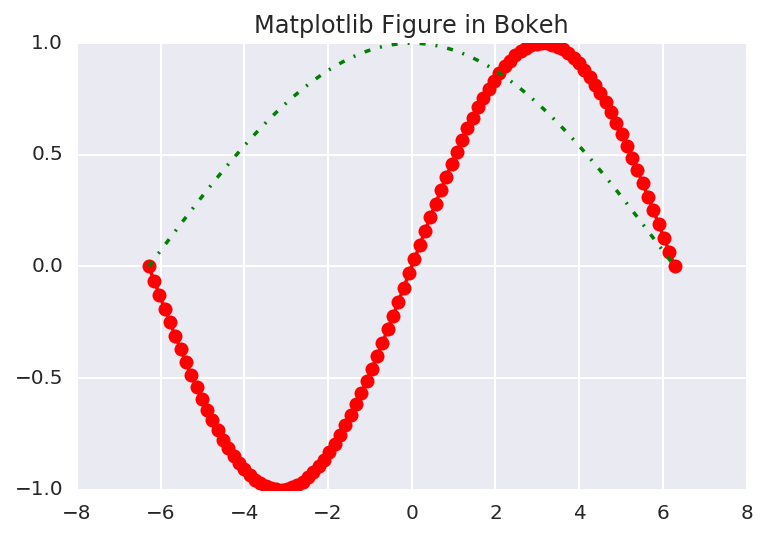

In [13]:
fig

If we want to render every figure in our notebook using the MPLD3 library, we simply need to call the `enable_notebook` function. Let's go ahead and do that now, to see how it works.

In [14]:
mpld3.enable_notebook()

Now, we can run the same code again, and this time it will automatically be rendered as an interactive web graphic, i.e., there's no longer a need to call the `mpld3.display` function as we did above.

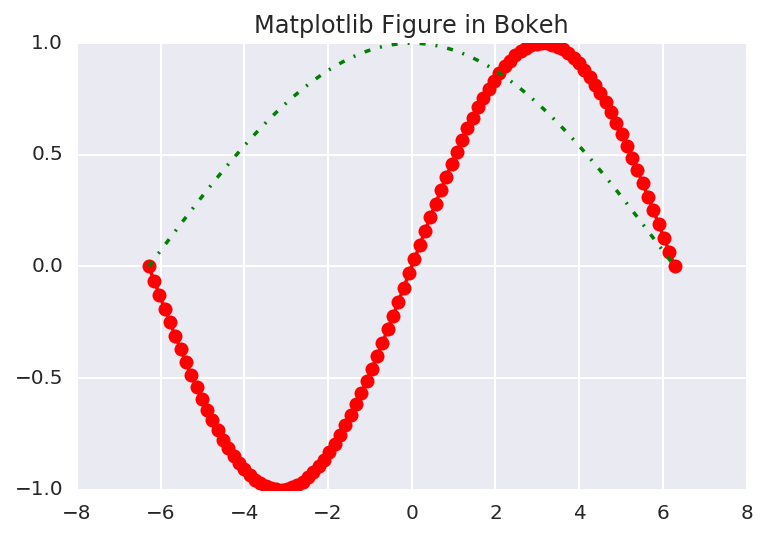

In [15]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x / 2)
z = np.cos(x / 4)

plt.title("Matplotlib Figure in Bokeh")
plt.plot(x, y, "r-", marker='o')
plt.plot(x, z, "g-x", linestyle="-.");

Finally, to get a taste for how much more feature complete this library is compared to the first two---with respect to the matplotlib API---we can run a bit of code from our Seaborn lesson and see how that looks when using the MPLD3 library to render the figure. 

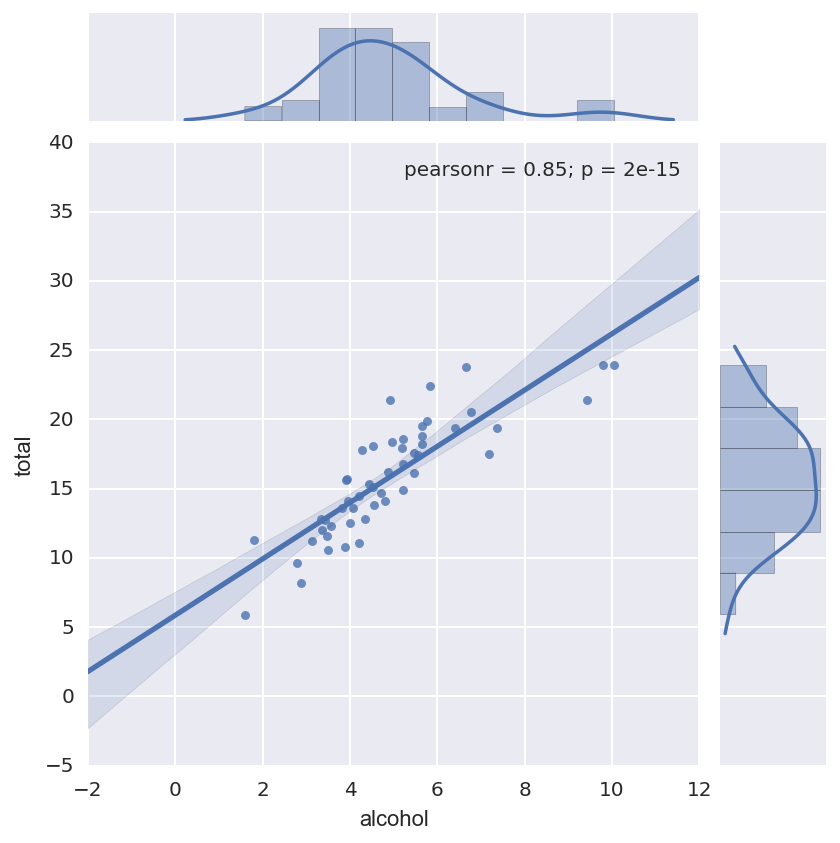

In [10]:
import seaborn as sns
crashes = sns.load_dataset('car_crashes')
sns.jointplot(x='alcohol', y='total', data=crashes, kind='reg');

And, that looks fantastic, and just take a second and give the interactive features a try. Notice that all of the plots in the figure are panned and zoomed in unison as you play around with the data. This is a really nice feature that you get for free when using the MPLD3 library.

And, that last example, is going to bring to the very end.

## Conclusion

In this lesson, we've seen three different data visualization libraries, each with a different purpose, that can be used to translate our static matplotlib figures into fully interactive, web-based graphics. Choosing the right library can be a bit difficult, but when you first consider your needs, you should be able to pick the right one. 

With that in mind, the most feature complete of the three libraries we reviewed is currently the MPLD3 library. This makes sense, given that its stated purpose is to bring together the matplotlib and D3.js libraries. The Bokeh and Plotly libraries, on the other hand, while certainly not as feature complete with respect to the matplotlib API as MPLD3, both have a much more interesting long term vision, and so both are libraries to keep an eye on, as well as use in your daily visualization tasks. And, now that you've seen how to use each one of these libraries with matplotlib, you can easily make the transition to whichever library most closely fits your requirements of your task whenever you find a need beyond what matplotlib can provide.